#Trabalho Final - PDI - UFPEL

#Enunciado
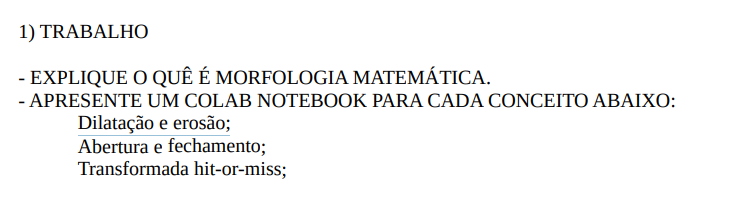

#1) Explique o que é morfologia matemática:

##R:
### **A morfologia matemática foi desenvolvida na década de 60 por Georges Matheron e Jean Serra, ela se basea na teoria dos conjuntos. Inicialmente desenvolvida para análise de imagens microscópias.**

### **A morfologia é a area que descreve várias técnicas de processamento de imagem que lidam com as características da forma em uma imagem, sendo usada para remover imperfeições indesejadas.**


#2) Apresente um colab notebook para cada conceito abaixo:

##Bibliotecas

In [28]:
from skimage import io, color, morphology
import matplotlib.pyplot as plt
import numpy as np

##Parte 1:

###Dilatação
###O objetivo da dilatação em processamento de imagem é expandir as regiões de interesse em uma imagem, tornando-as maiores ou mais espessas.

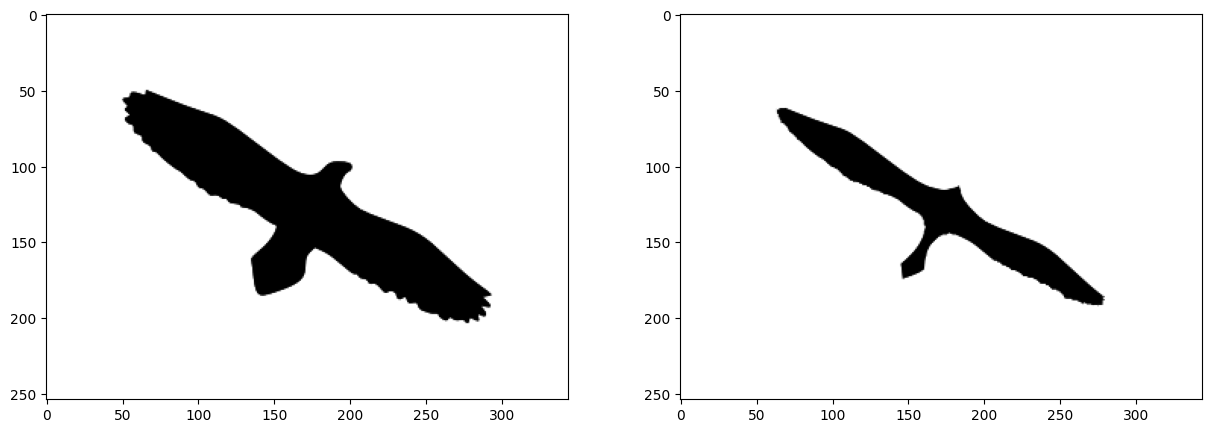

In [29]:
#Obrigatoriamente imagem deve ser binaria
# Aplique a dilatação com um elemento estruturante (kernel) específico

image = io.imread('eagle.png', as_gray=True)

# Você pode ajustar o tamanho do kernel para controlar o grau de dilatação
kernel = morphology.disk(10)  # Exemplo de um kernel circular de raio 5 pixels
dilated_image = morphology.dilation(image, kernel)

fig, axes = plt.subplots(ncols=2, figsize=(15, 5))

axes[0].imshow(image, cmap='gray')
axes[1].imshow(dilated_image, cmap='gray')

###Erosão
###O objetivo da erosão em processamento de imagem é reduzir o tamanho das regiões de interesse em uma imagem, tornando-as menores ou mais finas.

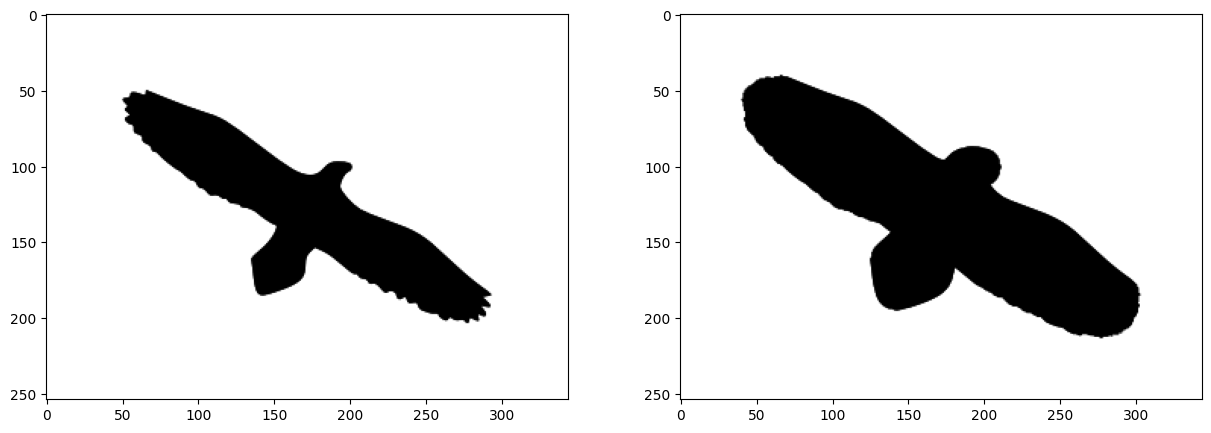

In [30]:
##Obrigatoriamente imagem deve ser binaria
# Aplique a dilatação com um elemento estruturante (kernel) específico

image = io.imread('eagle.png', as_gray=True)

# Você pode ajustar o tamanho do kernel para controlar o grau de dilatação
kernel = morphology.disk(10)  # Exemplo de um kernel circular de raio 5 pixels
dilated_image = morphology.erosion(image, kernel)

fig, axes = plt.subplots(ncols=2, figsize=(15, 5))

axes[0].imshow(image, cmap='gray')
axes[1].imshow(dilated_image, cmap='gray')

##Parte 2:

###Abertura
###O objetivo da abertura é remover pequenos ruídos, detalhes finos e separar objetos que estão muito próximos uns dos outros. A operação de abertura consiste em duas etapas: erosão seguida de dilatação. A erosão diminui os objetos e elimina pequenas saliências, enquanto a dilatação restaura o tamanho original dos objetos, mas mantém os detalhes finos removidos pela erosão. A abertura é útil para pré-processamento de imagens antes de operações de segmentação ou análise de objetos.

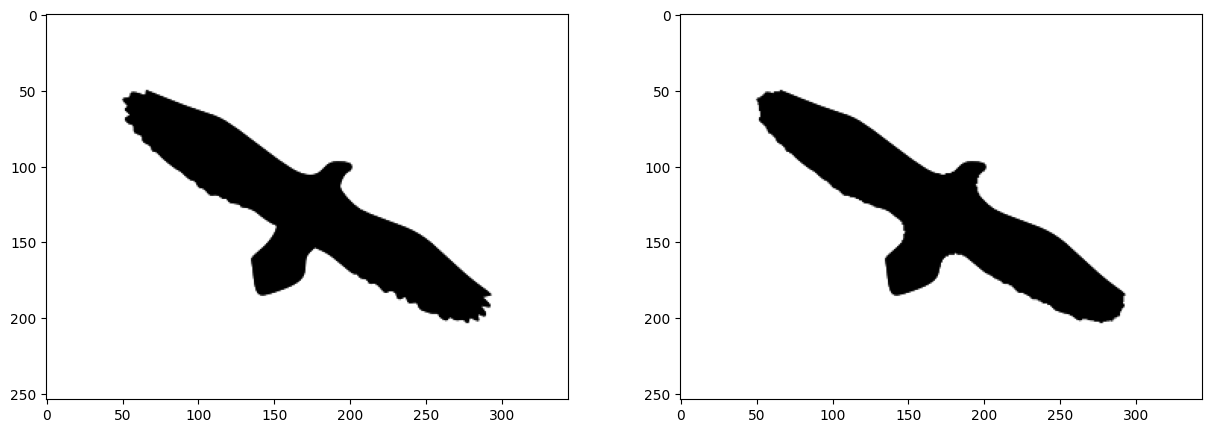

In [31]:
#Obrigatoriamente imagem deve ser binaria
# Aplique a dilatação com um elemento estruturante (kernel) específico

image = io.imread('eagle.png', as_gray=True)

# Você pode ajustar o tamanho do kernel para controlar o grau de dilatação
kernel = morphology.disk(10)  # Exemplo de um kernel circular de raio 5 pixels
dilated_image = morphology.opening(image, kernel)

fig, axes = plt.subplots(ncols=2, figsize=(15, 5))

axes[0].imshow(image, cmap='gray')
axes[1].imshow(dilated_image, cmap='gray')

###Fechamento
###O objetivo do fechamento é preencher pequenos buracos dentro dos objetos, conectar objetos que estão quase tocando e suavizar as regiões dos objetos. A operação de fechamento consiste em duas etapas: dilatação seguida de erosão. A dilatação preenche pequenos buracos e conecta objetos próximos, enquanto a erosão contrai os objetos novamente, mantendo sua forma geral. O fechamento é frequentemente usado para fechar pequenas aberturas em objetos e torná-los mais robustos em tarefas de segmentação.

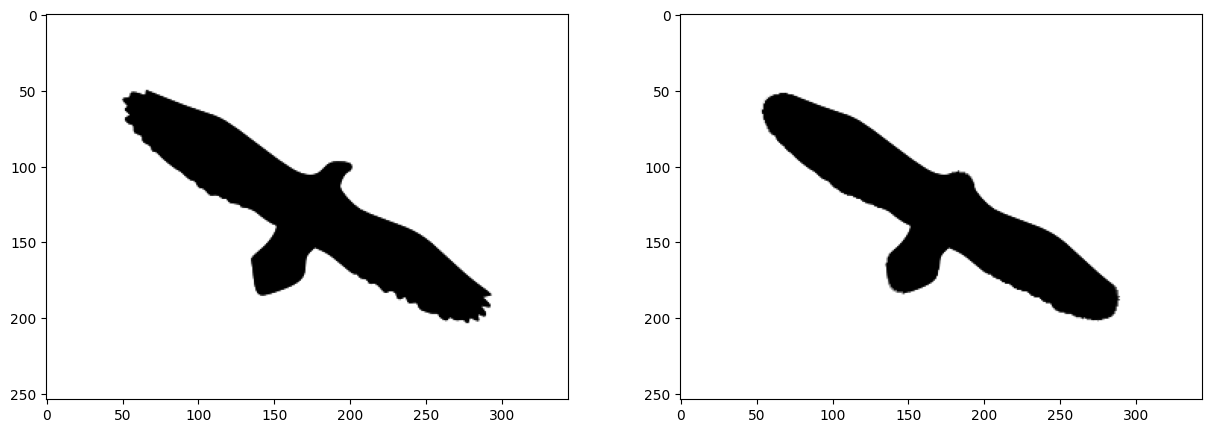

In [32]:
#Obrigatoriamente imagem deve ser binaria
# Aplique a dilatação com um elemento estruturante (kernel) específico

image = io.imread('eagle.png', as_gray=True)

# Você pode ajustar o tamanho do kernel para controlar o grau de dilatação
kernel = morphology.disk(10)  # Exemplo de um kernel circular de raio 5 pixels
dilated_image = morphology.closing(image, kernel)

fig, axes = plt.subplots(ncols=2, figsize=(15, 5))

axes[0].imshow(image, cmap='gray')
axes[1].imshow(dilated_image, cmap='gray')

##Parte 3:

###Transformada hit-or-miss
###A técnica da Transformada Hit-or-Miss (ou transformada Hit-or-Miss) é usada para detecção exata de padrões binários em uma imagem. O objetivo principal é encontrar a correspondência exata de um padrão específico em uma imagem maior. Esta técnica é frequentemente usada em processamento de imagem para tarefas de detecção de objetos ou características que têm uma forma e posição bem definidas.

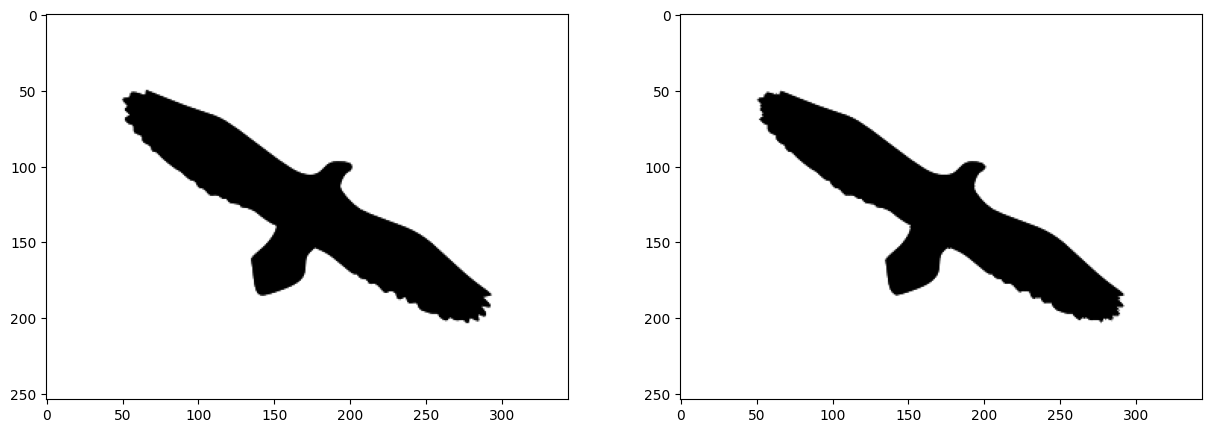

In [33]:
#Obrigatoriamente imagem deve ser binaria
# Aplique a dilatação com um elemento estruturante (kernel) específico

image = io.imread('eagle.png', as_gray=True)


# Defina o padrão de referência (elemento estruturante positivo)
reference_pattern = np.array([[0, 1, 0],
                              [1, 1, 1],
                              [0, 1, 0]], dtype=bool)

# Inverta o padrão de referência para obter o padrão complementar (elemento estruturante negativo)
complementary_pattern = ~reference_pattern

# Aplique a erosão com o padrão de referência na imagem
eroded_image_ref = morphology.erosion(image, reference_pattern)

# Aplique a erosão com o padrão complementar na imagem
eroded_image_comp = morphology.erosion(image, complementary_pattern)

# Aplique a dilatação com o padrão complementar na imagem erodida com o padrão de referência
hit_or_miss_result = morphology.dilation(eroded_image_ref, complementary_pattern)

fig, axes = plt.subplots(ncols=2, figsize=(15, 5))

axes[0].imshow(image, cmap='gray')
axes[1].imshow(hit_or_miss_result, cmap='gray')